In [1]:
import yfinance as yf
import pandas as pd

# List of stocks and date range
stocks = [
    'COST', 'UL', 'AMGN', 'UNH', 'WAT', 'UPS', 'LPX', 'WM', 'NVDA',
    'GOOGL', 'MSFT', 'AXP', 'BLK', 'BRK-B', 'NEE', 'XOM', 'CNI'
]

start_date = '2020-01-01'
end_date = '2024-01-01'

# Function to calculate annualized volatility
def calculate_volatility(ticker, start, end):
    try:
        # Download historical data
        data = yf.download(ticker, start=start, end=end)
        if 'Adj Close' not in data:
            print(f"No adjusted close data for {ticker}")
            return None

        # Calculate daily returns
        data['Daily Return'] = data['Adj Close'].pct_change()

        # Calculate annualized volatility
        volatility = data['Daily Return'].std() * (252 ** 0.5)  # 252 trading days
        return volatility
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Create a dictionary to store the volatility of each stock
volatility_data = {}

# Loop through each stock and calculate volatility
for stock in stocks:
    print(f"Calculating volatility for {stock}...")
    vol = calculate_volatility(stock, start_date, end_date)
    if vol is not None:
        volatility_data[stock] = vol

# Convert to a DataFrame for easier visualization
volatility_df = pd.DataFrame(list(volatility_data.items()), columns=['Stock', 'Volatility'])
volatility_df.sort_values(by='Volatility', ascending=False, inplace=True)

# Display the results
print(volatility_df)

# Save to a CSV file
volatility_df.to_csv('stock_volatility.csv', index=False)


Calculating volatility for COST...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for UL...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for AMGN...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for UNH...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for WAT...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for UPS...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for LPX...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for WM...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for NVDA...
[*********************100%%**********************]  1 of 1 completed
Calculating volatility for GOOGL...
[*********************100%%*********

[*********************100%%**********************]  1 of 1 completed


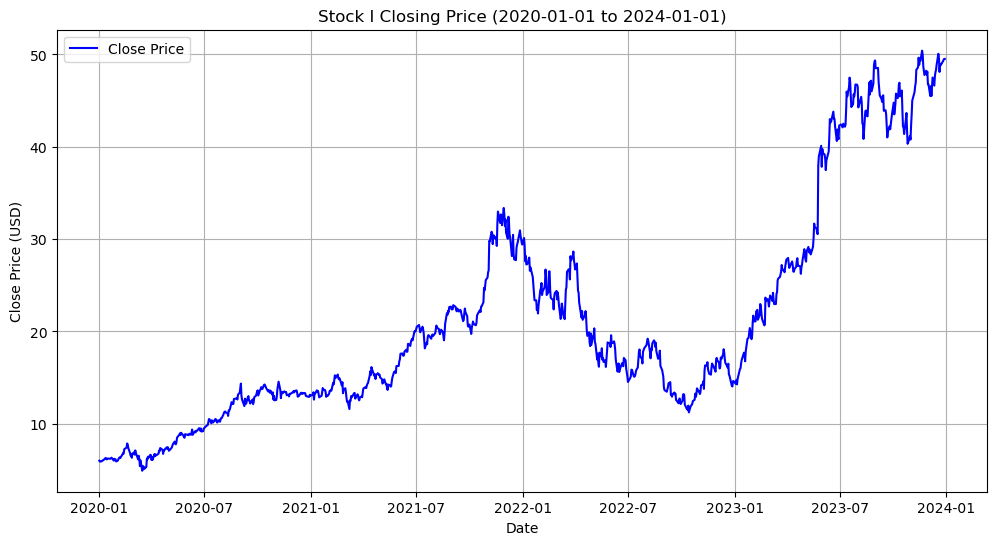

Figure saved to Stock_I_Close_Price_2020_2024.png


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define ticker and date range
ticker = 'NVDA'
start_date = '2020-01-01'
end_date = '2024-01-01'

# Download historical data
nvda_data = yf.download(ticker, start=start_date, end=end_date)

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(nvda_data['Close'], label='Close Price', color='blue')
plt.title(f'Stock I Closing Price ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()

# Save the figure to a file
file_path = "Stock_I_Close_Price_2020_2024.png"
plt.savefig(file_path, bbox_inches='tight')
plt.show()

print(f"Figure saved to {file_path}")
